<a href="https://colab.research.google.com/github/nreddyabhinav/ML/blob/master/Python_Notebooks/backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from scipy.io import loadmat
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
data = loadmat('drive/My Drive/ColabNo/nn/ex4data1.mat')
ilu = 400
hlu = 25
olu = 10

x = np.array(data['X'])
y = np.array(data['y'])


In [0]:
#splitting the data

count = np.zeros(np.max(y))

a=[]
b=[]
c=[]
d=[]
for i in range(0,len(y)):
  if(count[y[i]-1]<350):
    a.append(x[i])
    b.append(y[i])
    count[y[i]-1] = count[y[i]-1]+1
  else:
    c.append(x[i])
    d.append(y[i])
    
x=np.array(a)
y=np.array(b)
xtest=np.array(c)
ytest=np.array(d)

# np.random.shuffle(x)
# np.random.shuffle(y)
# np.random.shuffle(xtest)
# np.random.shuffle(ytest)

#checking y

In [0]:

each = np.zeros(10)
print(len(ytest))
for i in range(0,len(ytest)):
  each[ytest[i]-1]=each[ytest[i]-1]+1
print(each)

1500
[150. 150. 150. 150. 150. 150. 150. 150. 150. 150.]


#converting y to a vector


In [0]:


print(y[1000:1005])
highest = max(y)[0]
Y = np.zeros((1,highest))
for i in y:
  temp = np.zeros((1,highest))
  temp[0][i[0]-1]=1
#   print(temp)
  Y = np.concatenate((Y,temp),axis=0)

Y= Y[1:]

print(Y[1000:1005])

[[2]
 [2]
 [2]
 [2]
 [2]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
#changing test y data to a vector

print(ytest[1000:1005])
highest = max(ytest)[0]
Ytest = np.zeros((1,highest))
for i in ytest:
  temp = np.zeros((1,highest))
  temp[0][i[0]-1]=1
#   print(temp)
  Ytest = np.concatenate((Ytest,temp),axis=0)

Ytest= Ytest[1:]

print(Ytest[1000:1005])

[[6]
 [6]
 [6]
 [6]
 [6]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


#Displaying a number

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


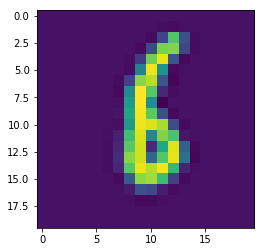

In [0]:
grid =np.reshape(x[2199,:],(20,20)).T

mpl.pyplot.imshow(grid,origin="upper")
print(Y[2199])

# Sigmoid function :

In [0]:
def sigmoid(s):
  return 1/(1+np.exp(-s))

In [0]:
def sigGradient(g):
  g = sigmoid(g)
  return g*(1-g)

#cost function

In [0]:
def cost(h):
#   s = 0
#   for i in range(0,m):
#     s= s+ (np.matmul((-Y[i]),np.log(h[i]).T)-np.matmul((1-Y[i]),np.log((1-h[i] )).T ))
    
#   return s/m
  return np.sum(np.sum((-Y)*np.log(h),axis=1)-np.sum((1-Y)*np.log(1-h),axis=1) )/m

#vectorized and regularized cost function 

In [0]:
def costvec(h,l):
  return (np.sum(np.sum((-Y)*np.log(h),axis=1)-np.sum((1-Y)*np.log(1-h), axis=1))/m)+(np.sum(np.sum(theta1[:,1:]**2,axis=0))+np.sum(np.sum(theta2[:,1:]**2,axis=0)))*l/(2*m) 

#Backpropagation

In [0]:
def bpANG(a,z,theta,alpha):
    d={}
    b3 = a["a3"] - Y
    b2 = np.matmul(b3,theta["theta2"])[:,1:]*sigGradient(z["z1"])
    d["d1"] = (np.matmul(b2.T,a["a1"]) /m)*alpha
    d["d2"] = (np.matmul(b3.T,a["a2"]) /m)*alpha
    return d
    

In [0]:
def bpCp(a,z,theta,m,alpha):
  d={}
  similar = ((a["a3"]-Y)/(a["a3"]*m*(1-a["a3"])))*sigGradient(z["z2"])
  d["d2"] = np.matmul(similar.T,a["a2"])*alpha
  d["d1"] = np.matmul((np.matmul(similar,theta["theta2"])*sigGradient(z["z1"])).T[1:,:],a["a1"])*alpha
  return d

#Initialize Theta

In [0]:
theta={}
m=3500
e1 = round((6**(0.5))/((hlu+ilu+1)**(0.5)),2)
print(e1)
theta["theta1"]=np.random.uniform(-e1,e1,(hlu,ilu+1))
e2 = round((6**(0.5))/((hlu+olu+1)**(0.5)),2)
print(e2)
theta["theta2"]=np.random.uniform(-e2,e2,(olu,hlu+1))
print(np.shape(theta['theta1']))
print(np.shape(theta['theta2']))

a={}
z={}

a['a1'] = np.concatenate((np.ones((m,1)),x),axis=1)
z['z1'] = np.concatenate((np.ones((m,1)),np.matmul(a['a1'],theta['theta1'].T)),axis=1)
a['a2'] = sigmoid(z['z1'])
z['z2'] = np.matmul(a["a2"],theta['theta2'].T)
a['a3'] = sigmoid(z['z2'])


J = np.array([cost(a["a3"])])
print(J)
print("_____________________________________")
print(np.shape(a["a1"]))
print(np.shape(a["a2"]))
print(np.shape(a["a3"]))
print(np.shape(z["z1"]))
print(np.shape(z["z2"]))
print(np.shape(theta["theta1"]))
print(np.shape(theta["theta2"]))

0.12
0.41
(25, 401)
(10, 26)
[7.86875695]
_____________________________________
(3500, 401)
(3500, 26)
(3500, 10)
(3500, 26)
(3500, 10)
(25, 401)
(10, 26)


#Train

In [0]:

a={}
z={}
for i in range(0,3500):
  a['a1'] = np.concatenate((np.ones((m,1)),x),axis=1)
  z['z1'] = np.concatenate((np.ones((m,1)),np.matmul(a['a1'],theta['theta1'].T)),axis=1)
  a['a2'] = sigmoid(z['z1'])
  z['z2'] = np.matmul(a["a2"],theta['theta2'].T)
  a['a3'] = sigmoid(z['z2'])
  
#   D1,D2 = bpANG(0.1)
#   print(D1[1][1])
#   print(D2[1][1])
#   print(cost(a3))



  d = bpCp(a,z,theta,3500,0.5)
#   d = bpANG(a,z,theta,0.5)
  theta["theta1"] = theta["theta1"] - d["d1"]
  theta["theta2"] = theta['theta2'] - d["d2"]
  J = np.concatenate((J,[cost(a["a3"])]))
#   stdout.flush()
  print("\r",end="")
  print(i,end="")
print("\nThe cost is: ",end="")
print(cost(a["a3"]))

3499
The cost is: 0.1777208887830438


#Testing

In [0]:
mt=np.shape(xtest)[0]

te1 = np.concatenate((np.ones((mt,1)),xtest),axis=1)
te2 = np.concatenate((np.ones((mt,1)),sigmoid(np.matmul(te1,theta["theta1"].T))),axis=1)
te3 = sigmoid(np.matmul(te2,theta["theta2"].T))
c=0
y=0
n=0
for i in range(0,mt):
  for j in range(0,10):
    if(te3[i,j]>0.3):
      te3[i,j] = 1
      y=y+1
    else:
      te3[i,j]=0
  if(np.array_equal(te3[i],Ytest[i])):
    c=c+1

print(c)
print(y)
print("accuracy")
print(c/mt)

1300
1536
accuracy
0.8666666666666667


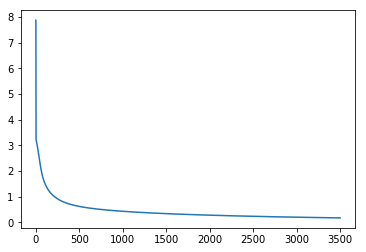

In [0]:
plt.plot(J)
plt.show()

#Rough

In [0]:
theta={}

e1 = round((6**(0.5))/((hlu+ilu+1)**(0.5)),2)
print(e1)
theta["theta1"]=np.random.uniform(-e1,e1,(hlu,ilu+1))
e2 = round((6**(0.5))/((hlu+olu+1)**(0.5)),2)
print(e2)
theta["theta2"]=np.random.uniform(-e2,e2,(olu,hlu+1))
print(np.shape(theta['theta1']))
print(np.shape(theta['theta2']))


a={}
z={}
a['a1'] = np.concatenate((np.ones((m,1)),x),axis=1)
z['z1'] = np.matmul(a['a1'],theta['theta1'].T)
a['a2'] = np.concatenate((np.ones((m,1)),sigmoid(z['z1'])),axis=1)
z['z2'] = np.matmul(a["a2"],theta['theta2'].T)
a['a3'] = sigmoid(z['z2'])

print(np.shape(a["a3"]))
print(np.shape(Y))
print(np.shape(z["z2"]))
print(np.shape(a["a2"]))
print(np.shape(theta["theta2"]))
print(np.shape(z["z1"]))
print(np.shape(a["a1"]))

0.12
0.41
(25, 401)
(10, 26)
(3500, 10)
(3500, 10)
(3500, 10)
(3500, 26)
(10, 26)
(3500, 25)
(3500, 401)


In [0]:

a={}
z={}
for i in range(0,3500):
  a['a1'] = x
  z['z1'] = np.matmul(np.concatenate((np.ones((m,1)),a['a1']),axis=1),theta['theta1'].T)
  a['a2'] = sigmoid(z['z1'])
  z['z2'] = np.matmul(np.concatenate((np.ones((m,1)),a["a2"]),axis=1),theta['theta2'].T)
  a['a3'] = sigmoid(z['z2'])
  
#   D1,D2 = bpANG(0.1)
#   print(D1[1][1])
#   print(D2[1][1])
#   print(cost(a3))



#   d = bpCp(a,z,theta,0.1)
  d = bpANG(a,z,theta,0.5)
  theta["theta1"] = theta["theta1"] - d["d1"]
  theta["theta2"] = theta['theta2'] - d["d2"]
  J = np.concatenate((J,[cost(a["a3"])]))
#   stdout.flush()
  print("\r",end="")
  print(i,end="")
print("\nThe cost is: ",end="")
print(cost(a["a3"]))

In [0]:
def test(h):
  m=3500
  return np.sum(np.sum((-Y)*np.log(h),axis=1)-np.sum((1-Y)*np.log(1-h),axis=1) )/m